In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104865,69261.0,-1.986696,0.052652,1.319907,0.621464,-2.412983,0.385500,0.233963,0.831331,0.050126,...,-0.073902,-0.378799,0.125447,0.474156,-0.019902,1.084057,-0.206905,-0.246040,289.49,0
188038,127793.0,-0.913256,0.776058,0.748024,0.532728,-0.539830,-0.022478,0.132565,0.411352,0.485947,...,0.078286,0.504929,0.180074,-0.081916,-0.555333,-0.849244,-0.070975,-0.162673,92.32,0
246630,153251.0,-1.655887,0.245394,2.133503,-0.989326,-1.563971,0.169681,-0.759279,0.491190,-0.313651,...,-0.106654,0.284365,-0.432906,-0.020189,0.177774,-0.152396,-0.775328,-0.536192,55.13,0
268914,163443.0,-0.418488,0.692182,1.802671,0.531961,0.214708,1.066067,-0.128184,0.433973,-0.892670,...,0.060886,-0.016637,0.061707,0.332849,-1.252475,1.947536,-0.121217,0.155323,7.84,0
265772,162043.0,2.256379,-0.623921,-1.583992,-1.061259,-0.126224,-0.821125,-0.296141,-0.377669,-0.677888,...,0.419062,1.243074,-0.028729,0.561530,0.298144,0.048007,-0.037932,-0.059287,15.00,0


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


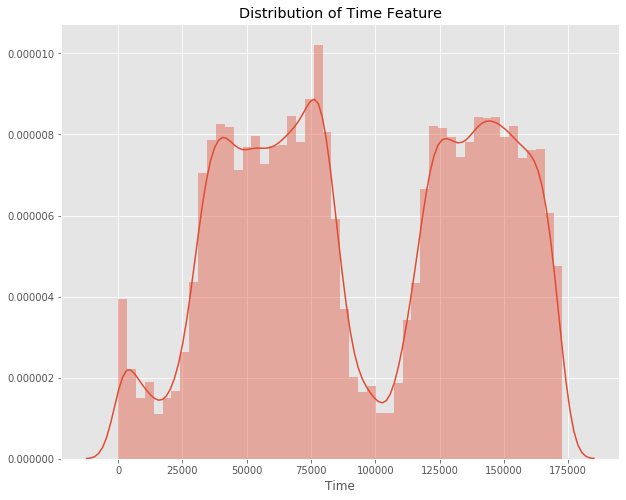

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

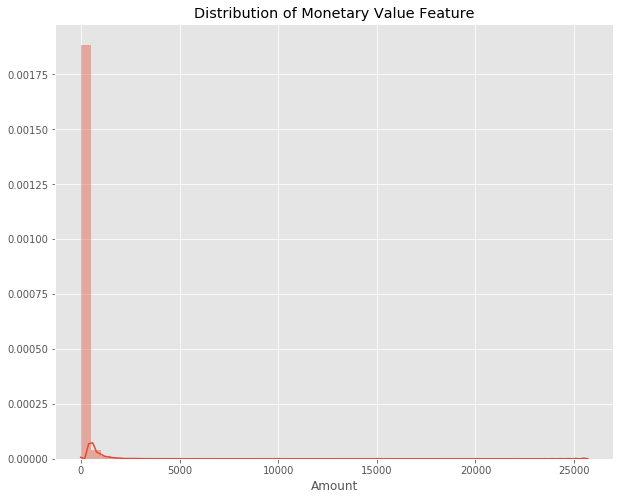

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [9]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

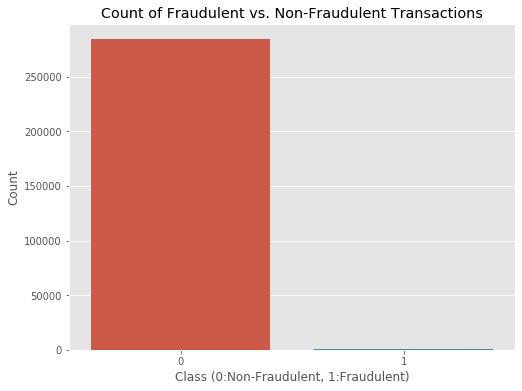

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

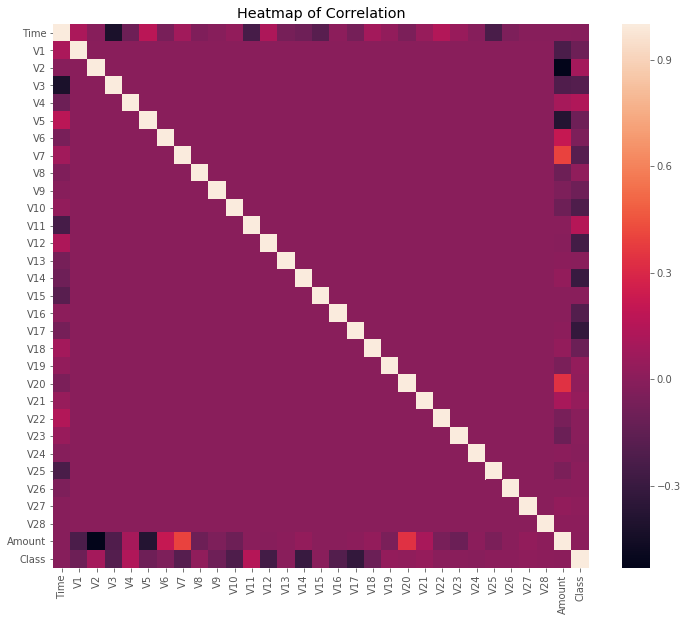

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [13]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [15]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
63820,50881.0,-1.872,-2.194,1.692,-1.203,1.455,-1.270,-0.443,-0.386,-0.662,...,-0.254,0.050,-0.035,-0.476,-0.246,-0.233,100.50,0,0.049,-0.925
142566,84794.0,1.313,0.079,-1.292,-0.484,2.140,3.181,-0.506,0.805,-0.074,...,0.096,0.946,0.370,0.111,-0.022,0.023,0.89,0,-0.350,-0.211
227567,145126.0,0.161,0.996,-0.566,-0.632,1.094,-0.548,0.940,-0.048,0.014,...,0.063,0.157,-0.395,0.141,0.223,0.080,4.49,0,-0.335,1.059
165351,117374.0,2.010,-0.061,-0.994,0.318,-0.080,-0.928,0.126,-0.228,0.186,...,0.331,0.094,-0.322,0.171,-0.071,-0.068,3.57,0,-0.339,0.475
24450,33241.0,1.277,0.635,-0.816,0.962,0.701,-0.254,0.176,-0.017,-0.253,...,-0.279,-0.974,0.813,-0.272,0.029,0.035,1.00,0,-0.349,-1.297


In [17]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256628, 31)
Test Shape: (28179, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 447 fraudulent transactions in the train data.


In [21]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
256556,1.966,0.165,-1.794,1.181,0.476,-1.163,0.663,-0.310,-0.242,0.560,...,0.510,-0.016,-0.013,0.368,-0.503,-0.045,-0.072,0,-0.239,1.641
73180,1.303,-1.149,-0.102,-1.446,-1.051,-0.496,-0.571,-0.096,-2.404,1.553,...,-0.964,0.103,-0.037,0.196,-0.445,-0.002,0.015,0,0.029,-0.757
132259,-1.405,1.986,-1.291,-1.672,1.134,-1.327,1.839,-0.606,1.243,2.322,...,0.732,-0.273,-0.427,-0.033,0.073,0.780,0.248,0,-0.347,-0.146
116505,-0.879,0.099,2.569,1.057,-0.792,1.008,0.322,0.366,0.533,-0.949,...,0.490,0.156,0.099,-0.036,-0.339,0.156,0.146,0,0.246,-0.332
179102,-0.606,-1.076,-0.452,-0.226,3.426,3.902,0.071,0.675,0.880,-0.023,...,-1.100,0.535,0.608,-0.825,-1.282,-0.334,-0.210,0,0.069,0.796


In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

894

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.918,-1.980,-0.966,-1.493,-1.476,-0.398,-1.011,-0.146,-1.397,1.639,...,0.062,0.041,-0.339,-0.296,-0.198,-0.015,-0.028,0,0.425,0.666
1,-2.151,2.188,-3.431,0.119,-0.173,0.291,-2.809,-2.679,-0.557,-4.485,...,0.561,-0.075,-0.438,0.354,-0.521,0.144,0.027,1,-0.153,1.165
2,0.127,1.013,-0.386,-0.524,0.898,-0.876,0.968,-0.112,-0.047,-0.834,...,-0.829,0.109,0.629,-0.426,0.109,0.221,0.085,0,-0.333,1.424
3,1.088,0.898,0.395,3.170,0.176,-0.222,-0.023,-0.011,0.860,-0.592,...,-0.801,0.078,0.168,0.350,-0.119,0.013,0.054,1,-0.338,-1.635
4,-0.682,1.197,0.302,-0.458,0.744,0.553,0.301,0.538,-0.906,-0.437,...,0.396,-0.253,-1.292,-0.262,0.368,-0.143,0.061,0,-0.347,-1.068
5,0.172,1.693,-2.344,1.456,1.153,-1.071,0.580,0.325,-0.778,-1.196,...,0.772,-0.010,-0.695,-0.575,-0.423,0.281,0.080,0,-0.239,1.614
6,2.156,-0.763,-1.629,-0.993,-0.093,0.214,-1.034,0.120,-0.164,0.236,...,0.661,-0.011,-0.392,-0.023,-0.080,0.018,-0.022,0,-0.233,0.392
7,-1.053,1.620,-1.238,-0.364,0.177,-0.887,0.197,0.765,-0.345,-0.875,...,1.017,-0.192,-0.493,-0.452,-0.155,-0.045,0.141,0,-0.301,0.799
8,-3.601,4.519,-6.341,6.215,-5.830,-2.478,-9.938,2.830,-5.659,-11.298,...,0.621,-0.094,0.537,0.398,0.008,2.054,0.836,1,-0.338,-1.131
9,-0.783,0.731,1.413,0.740,0.193,0.073,0.576,0.237,-0.242,-0.060,...,0.205,0.017,0.213,0.248,-0.368,0.200,0.047,0,-0.258,-1.363


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

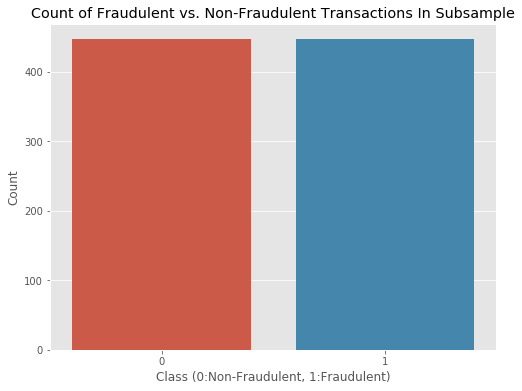

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.427
V2,0.475
V3,-0.574
V4,0.705
V5,-0.374
V6,-0.400
V7,-0.473
V8,0.047
V9,-0.550
V10,-0.628


In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.574
V9,-0.550
V10,-0.628
V12,-0.691
V14,-0.755
V16,-0.604
V17,-0.565


In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.705
V11,0.683
Class,1.000


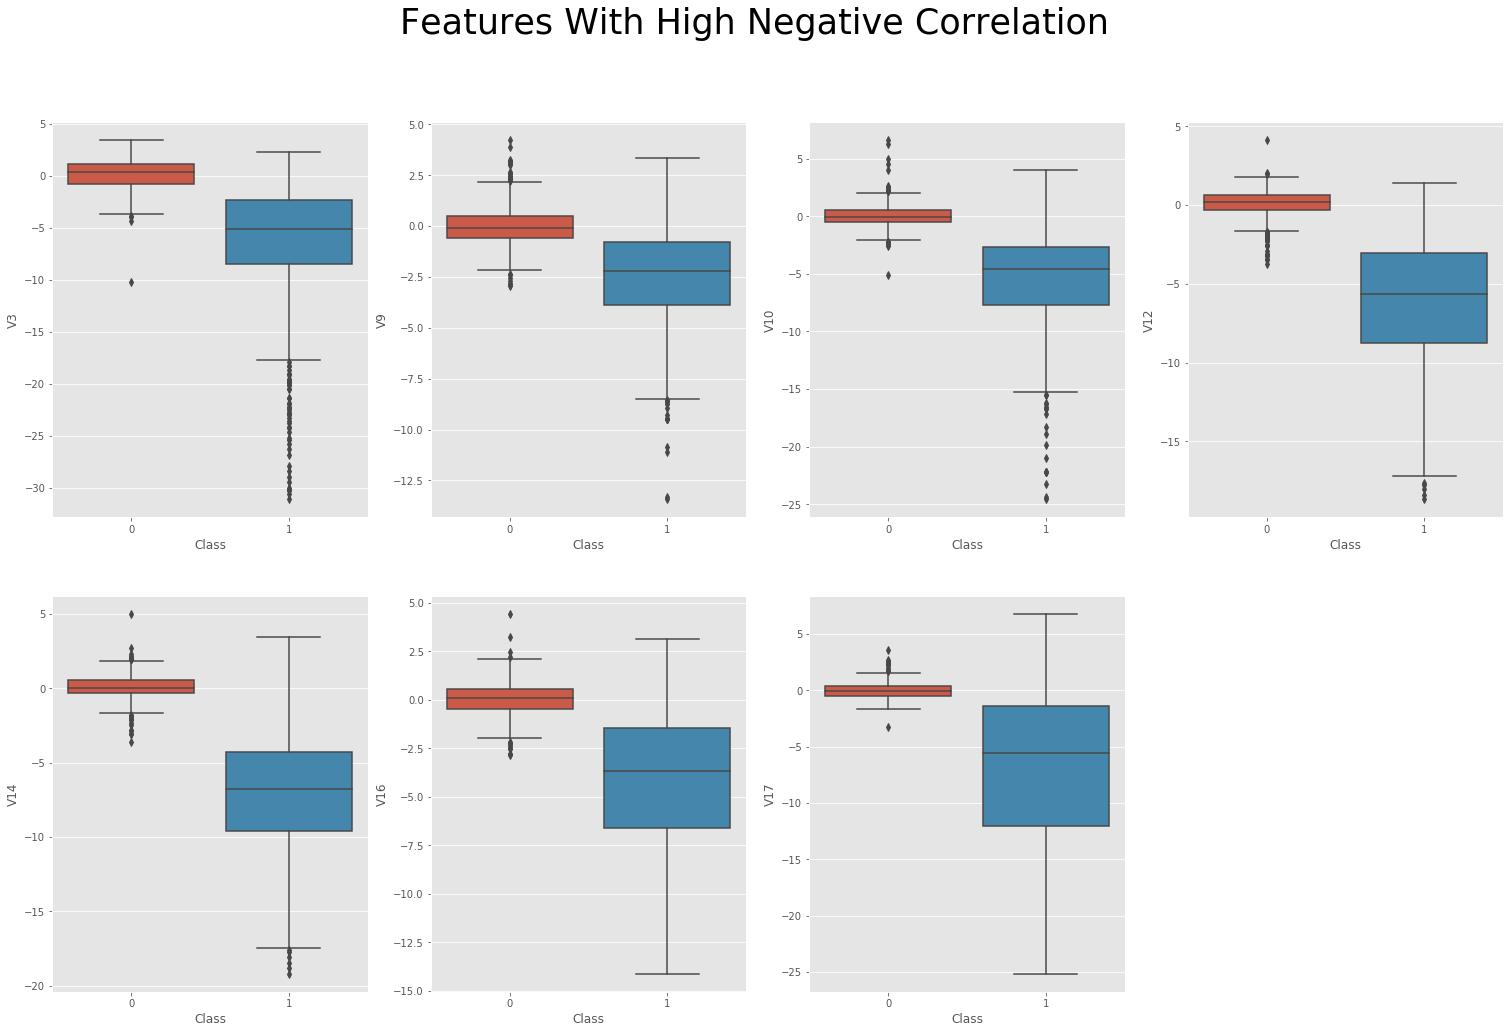

In [30]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

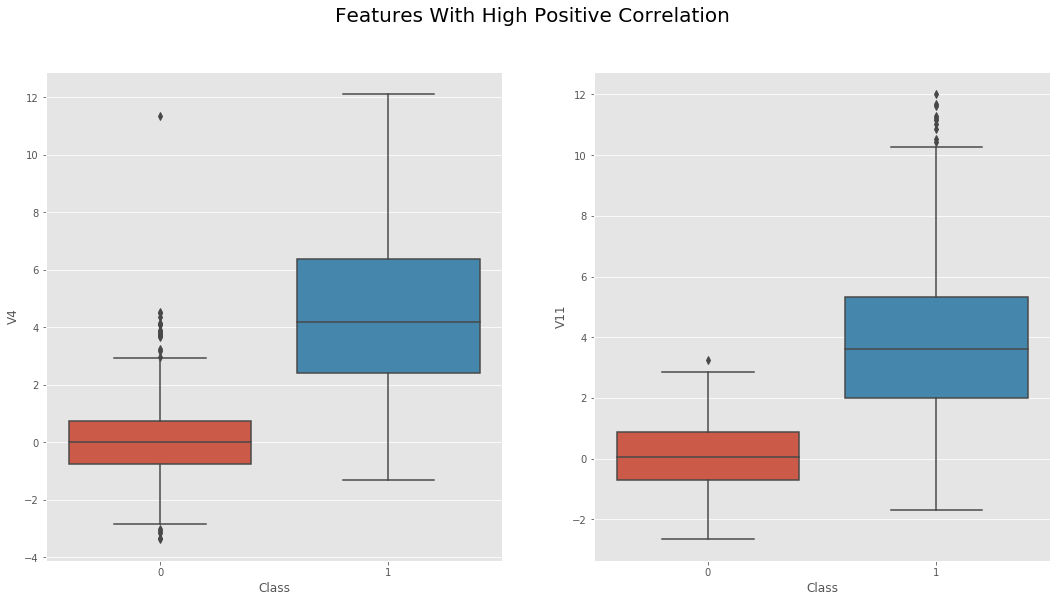

In [31]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [32]:
#Box plots provide us with a good intuition of whether we need to worry about outliers as all transactions outside of 1.5 times the IQR (Inter-Quartile Range) are usually 
#considered to be outliers. However, removing all transactions outside of 1.5 times the IQR would dramatically decrease our training data size, which is not very large, to begin with. 
#Thus, I decided to only focus on extreme outliers outside of 2.5 times the IQR.

#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 894 transactions by 272 transactions to 622 transactions.


**Dimensionality Reduction**

In [34]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [35]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

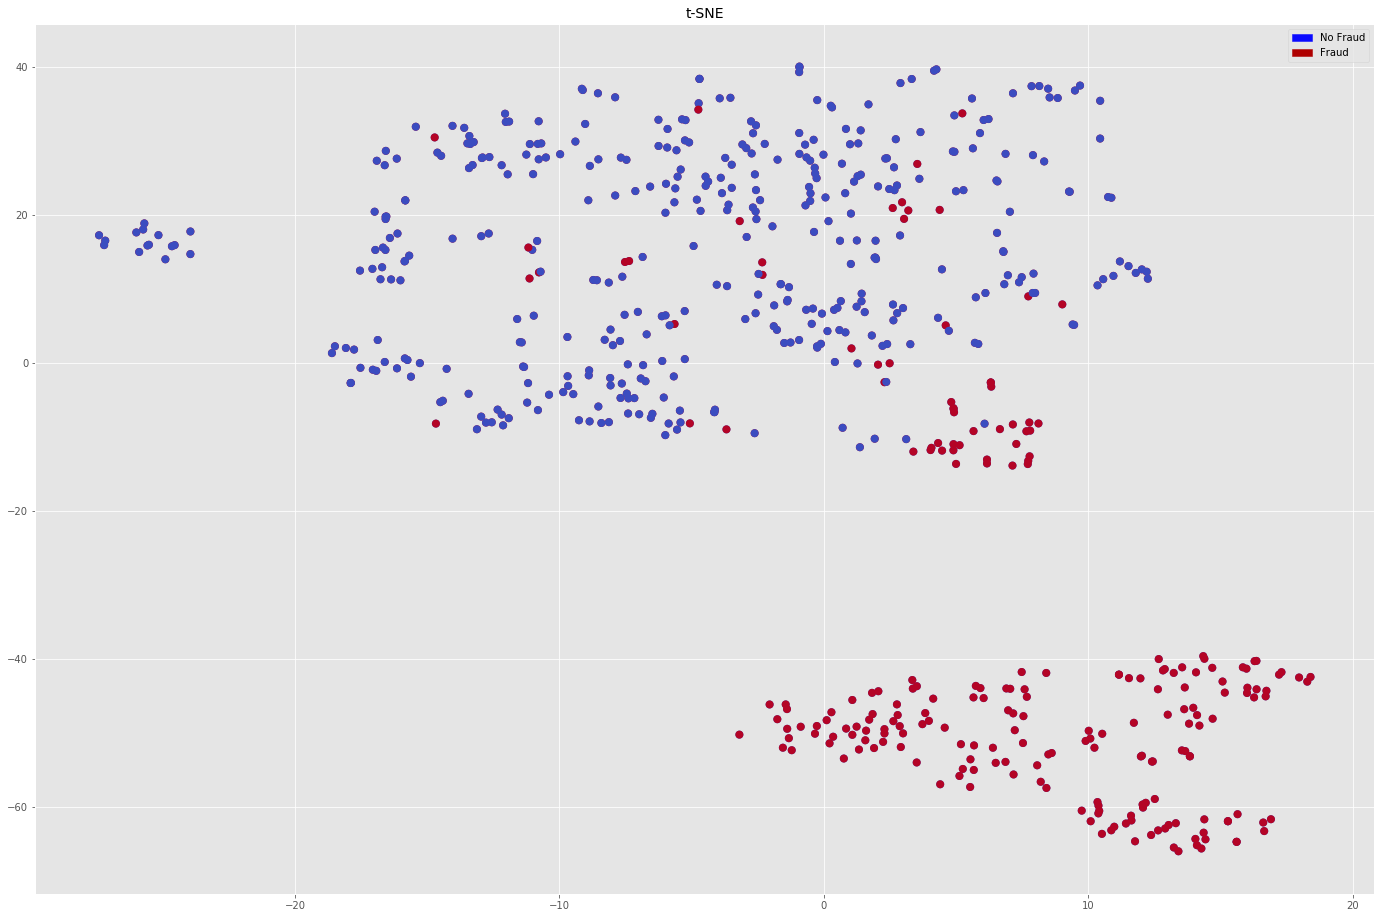

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


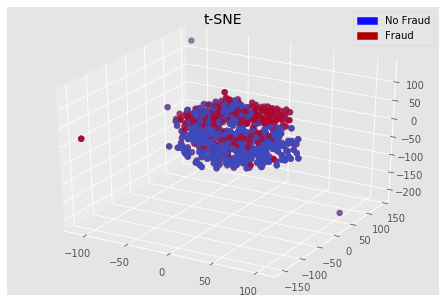

In [37]:
#from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

X = df2.drop('Class', axis=1)
y = df2['Class']

#t-SNE
X_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X.values)

# t-SNE scatter plot
#import matplotlib.patches as mpatches

#f, ax = plt.subplots(figsize=(24,16))



blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

fig = plt.figure()
plt.rcParams['figure.figsize'] = (60, 40)
ax = Axes3D(fig)


ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], X_reduced_tsne[:,2], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [41]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (497, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (497,) (125,)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [43]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.977384 (0.016692)
LDA: 0.975857 (0.018954)
KNN: 0.959314 (0.031861)
CART: 0.900059 (0.043789)
SVM: 0.969362 (0.029588)
XGB: 0.965952 (0.025196)
RF: 0.950248 (0.030739)


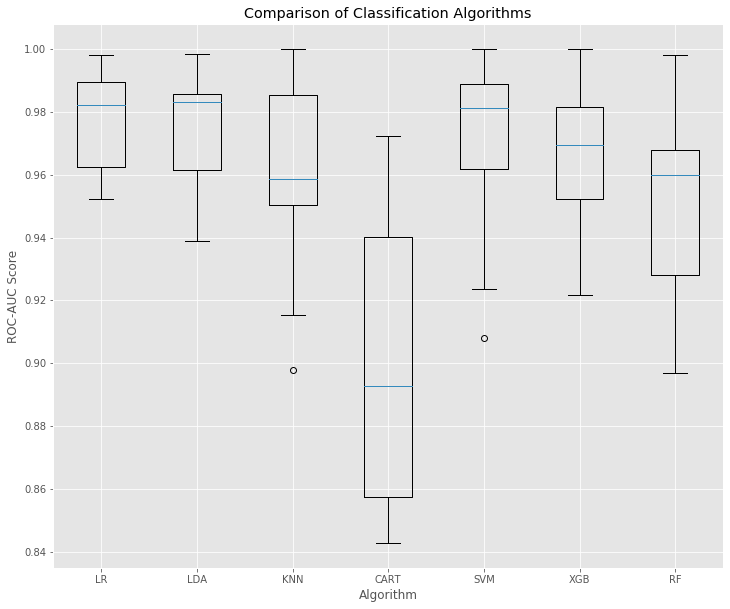

In [44]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [45]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [46]:
#pasar a mano .dot to .png

In [47]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

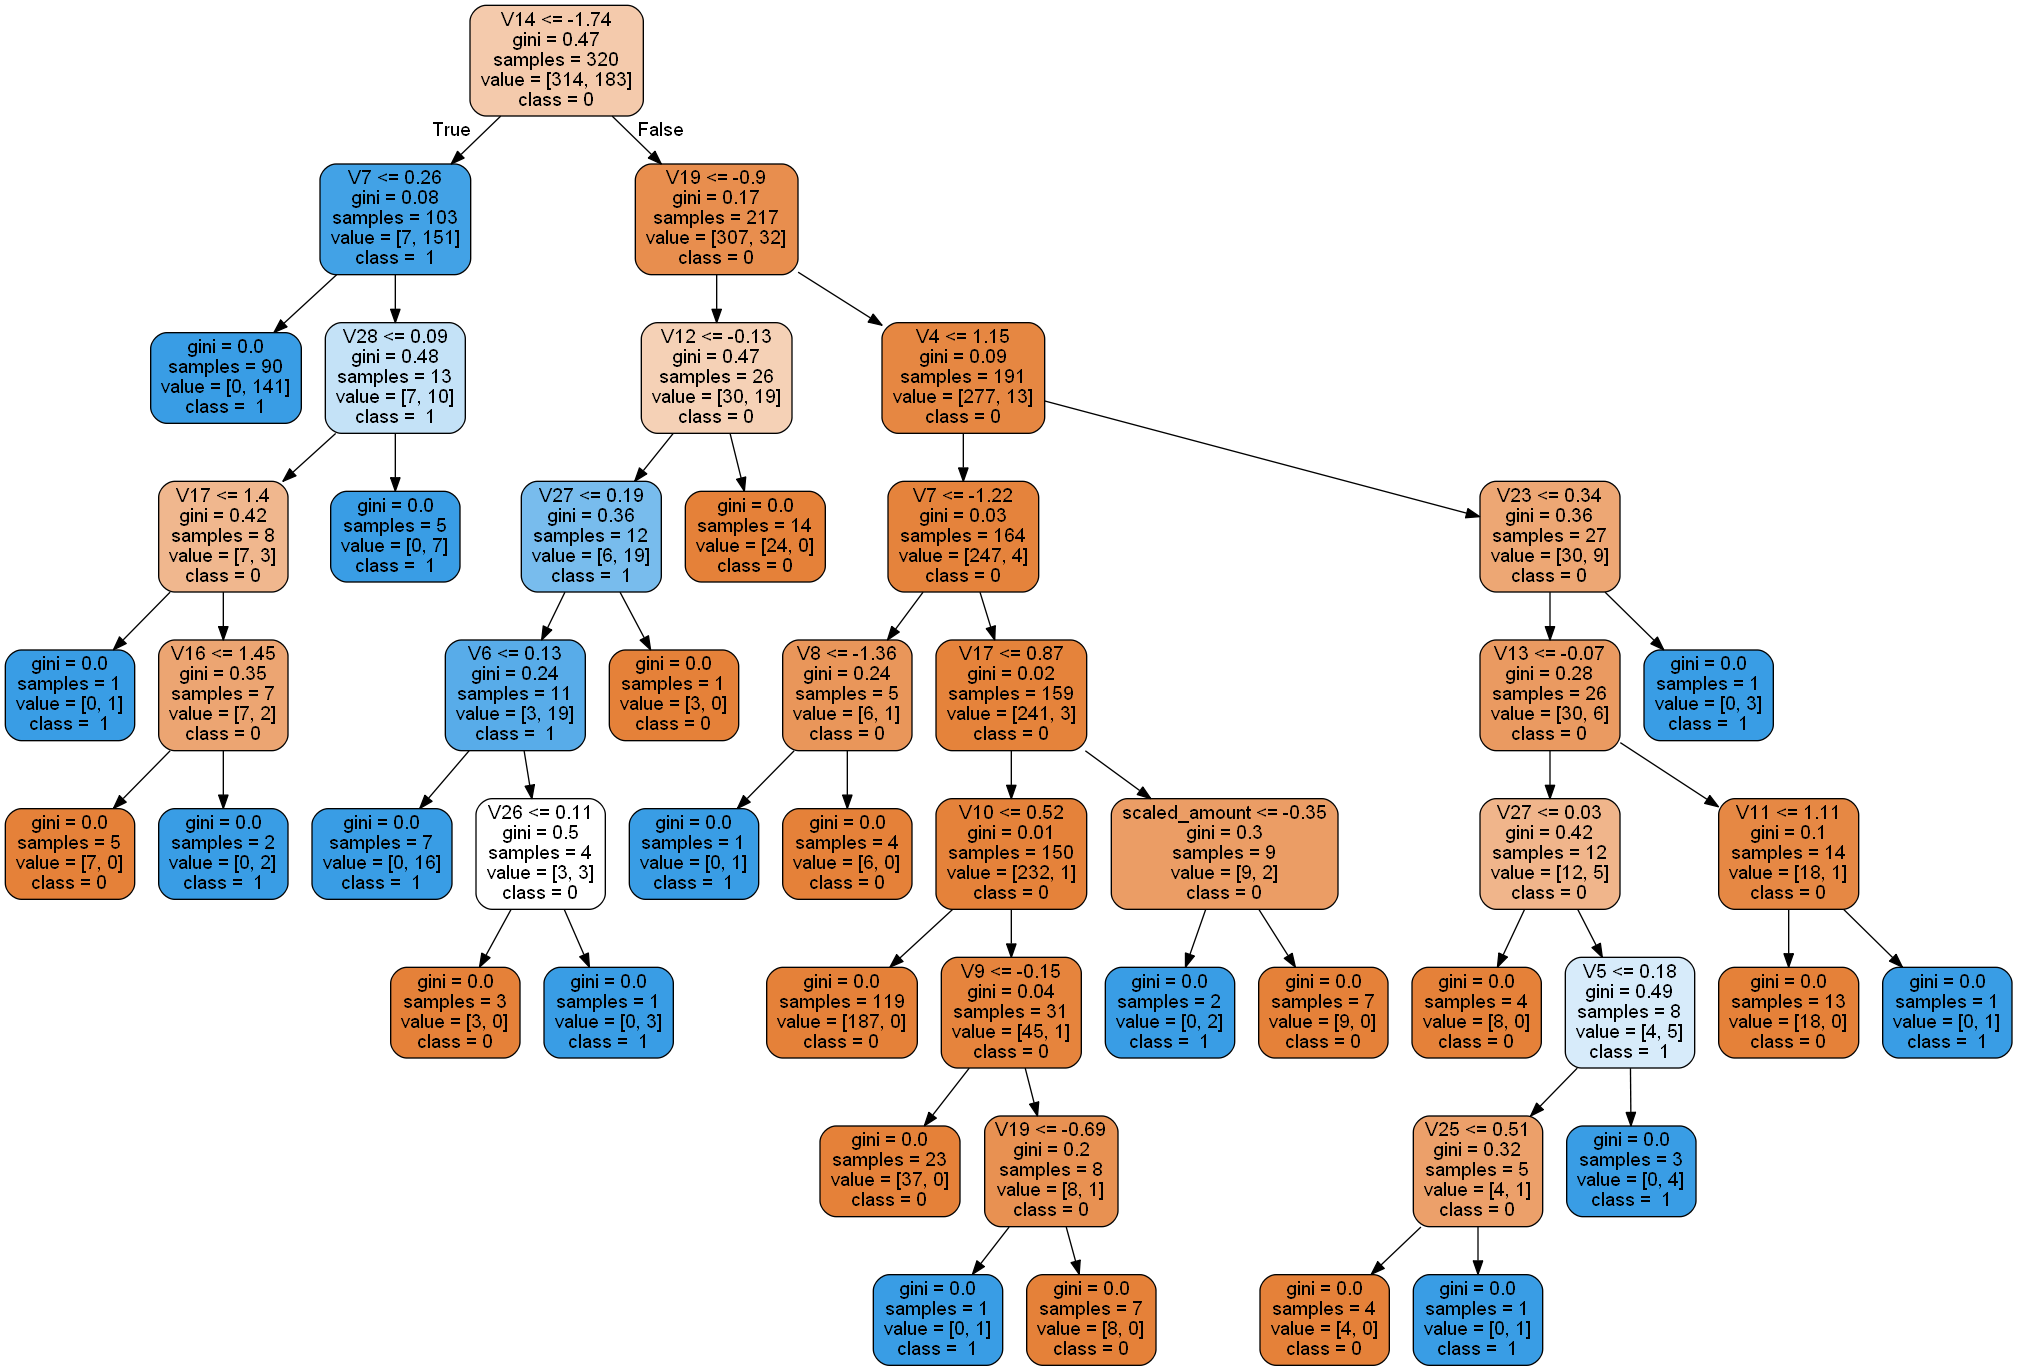

In [48]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')